In [ ]:
import pandas as pd
import plotly.express as px
from geopy.geocoders import Nominatim
import networkx as nx
import matplotlib.pyplot as plt 
import geocoder

In [ ]:
points_df = pd.read_csv("points_df.csv").rename(columns={"long":"lon"})
points_df = points_df.drop_duplicates(subset=["lat","lon"])
display(points_df.linha.value_counts())
display(points_df.info())

1029    2418
66      1439
588      689
63       339
48       326
31       324
54A      203
30       198
18        99
Name: linha, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6035 entries, 0 to 6102
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   arquivo  6035 non-null   object 
 1   lon      6035 non-null   float64
 2   lat      6035 non-null   float64
 3   linha    6035 non-null   object 
 4   nome     6035 non-null   object 
dtypes: float64(2), object(3)
memory usage: 282.9+ KB


None

In [ ]:
px.set_mapbox_access_token("pk.eyJ1IjoiYXJrYWlzaG8iLCJhIjoiY2tocWc5cHh5MDYzNzJ1bnQ3YnQxbDhwbSJ9.XE2pXBGgoMONc8aZFk_U5w")

fig = px.line_mapbox(points_df, lat="lat", lon="lon",color="linha", zoom=3,)

fig.show()

In [ ]:
%%time
l = list(points_df.loc[0,["lat","lon"]].values)
geolocator = Nominatim(user_agent="data_science")
location = geolocator.reverse(tuple(l))
location.raw["address"]["road"]

CPU times: user 23.8 ms, sys: 773 µs, total: 24.6 ms
Wall time: 563 ms


'Rua Apostolo Simão'

In [ ]:
def getInformation(row):
    lat = row.lat
    lon = row.lon
    location = geolocator.reverse((lat,lon))
    return location.raw["address"]

In [ ]:
df = points_df.head().copy()
df["information"] = df.apply(getInformation,axis=1)
df

,arquivo,lon,lat,linha,nome,information
0,downloads/1029.kml,-35.263029,-5.724838,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...","{'office': 'rua tal lalala 16 postes', 'road':..."
1,downloads/1029.kml,-35.263291,-5.725240,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...","{'office': 'rua tal lalala 16 postes', 'road':..."
2,downloads/1029.kml,-35.263340,-5.725348,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...","{'office': 'rua tal lalala 16 postes', 'road':..."
3,downloads/1029.kml,-35.263314,-5.725434,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...","{'office': 'rua tal lalala 16 postes', 'road':..."
4,downloads/1029.kml,-35.263195,-5.725563,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...","{'road': 'Avenida Guararapes', 'suburb': 'Lago..."


In [ ]:
%%time
points_df["information"] = points_df.apply(getInformation,axis=1)

CPU times: user 25.5 s, sys: 1.15 s, total: 26.6 s
Wall time: 50min 31s


In [ ]:
points_df.to_csv("points_with_information.csv",index=False)

In [ ]:
points_df.information[0]

{'office': 'rua tal lalala 16 postes',
 'road': 'Rua Apostolo Simão',
 'suburb': 'Lagoa Azul',
 'city_district': 'Região Norte',
 'city': 'Natal',
 'municipality': 'Região Geográfica Imediata de Natal',
 'state_district': 'Região Geográfica Intermediária de Natal',
 'state': 'Rio Grande do Norte',
 'region': 'Região Nordeste',
 'postcode': '59139340',
 'country': 'Brasil',
 'country_code': 'br'}

In [ ]:
def getRoad(d):
    if "road" in d:
        return d["road"]
    else:
        return None
def getSuburb(d):
    if "suburb" in d:
        return d["suburb"]
    else:
        return None

In [ ]:
points_df["rua"]=points_df.information.apply(getRoad)
points_df["bairro"]=points_df.information.apply(getSuburb)

In [ ]:
print("Linhas com bairro invalidas nos pontos")
display(points_df.loc[points_df.bairro.isna()].linha.value_counts())
print("Linhas com rua invalidas nos pontos")
display(points_df.loc[points_df.rua.isna()].linha.value_counts())

Linhas com bairro invalidas nos pontos


588     119
1029     42
63       18
48       10
18        8
31        8
66        7
54A       3
Name: linha, dtype: int64

Linhas com rua invalidas nos pontos


31      24
48      21
66      18
30      18
1029    16
63       7
18       4
54A      4
588      1
Name: linha, dtype: int64

In [ ]:
points_df.drop_duplicates(subset=["linha","rua","bairro"]).to_csv("line_streets.csv")

In [ ]:
lines_df = pd.read_csv("line_streets.csv").loc[:,["linha","nome","rua","bairro"]]
lines_df

,linha,nome,rua,bairro
0,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",Rua Apostolo Simão,Lagoa Azul
1,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",Avenida Guararapes,Lagoa Azul
2,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",Avenida dos Caboclinhos,Lagoa Azul
3,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",Rua Oficina do Açu,Lagoa Azul
4,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",Avenida da Chegança,Lagoa Azul
...,...,...,...,...
671,66,"Ponta Negra/Cidade da Esperança, via Bom Pastor",Rua Manoel Messias Soares,Capim Macio
672,66,"Ponta Negra/Cidade da Esperança, via Bom Pastor",Rua Praia Jardim de Alá,Ponta Negra
673,66,"Ponta Negra/Cidade da Esperança, via Bom Pastor",Rua Praia de Cabedelo,Ponta Negra
674,66,"Ponta Negra/Cidade da Esperança, via Bom Pastor",Rua Praia de Itamaracá,Ponta Negra


In [ ]:
lines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   linha   676 non-null    object
 1   nome    676 non-null    object
 2   rua     636 non-null    object
 3   bairro  650 non-null    object
dtypes: object(4)
memory usage: 21.2+ KB


In [ ]:
lines_df.loc[lines_df.rua.isnull()]

,linha,nome,rua,bairro
42,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",NaN,Lagoa Nova
69,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",NaN,Nova Descoberta
92,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",NaN,Potengi
95,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",NaN,Lagoa Azul
97,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",NaN,NaN
121,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",NaN,Quintas
124,1029,"Nova Natal/Nova Descoberta, via Av. da Cheganç...",NaN,Salinas
134,18,Bairro Nordeste/Campus,NaN,Quintas
140,18,Bairro Nordeste/Campus,NaN,Lagoa Nova
149,18,Bairro Nordeste/Campus,NaN,Capim Macio


In [ ]:
lines_df = lines_df.dropna()

In [ ]:
lines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 675
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   linha   615 non-null    object
 1   nome    615 non-null    object
 2   rua     615 non-null    object
 3   bairro  615 non-null    object
dtypes: object(4)
memory usage: 24.0+ KB


In [ ]:
def createEdges(row):
    return (row.rua,row.bairro)

In [ ]:
edges = list(lines_df.apply(createEdges,axis=1).values)
g = nx.Graph()
g.add_edges_from(edges)

In [ ]:
g.degree["Ponta Negra"]

39

In [ ]:
nx.write_graphml(g,"test.graphml")

In [ ]:
g = nx.read_graphml("grafo_rotas.graphml")

In [ ]:
g.nodes['Alecrim']

{'Betweenness Centrality': 0.13836074162031517,
 'Closeness Centrality': 0.3242506811989101,
 'Eccentricity': 7.0,
 'Harmonic Closeness Centrality': 0.36907429638522,
 'Modularity Class': 4,
 'b': 158,
 'g': 255,
 'label': 'Alecrim',
 'r': 163,
 'size': 46.312172,
 'x': 494.669,
 'y': 352.6805}

In [ ]:
pos = {node: [g.nodes[node]['x'],g.nodes[node]['y']]for node in g}
pos

{'Alecrim': [494.669, 352.6805],
 'Anel Viário da UFRN': [-679.9391, 132.92409],
 'Avenida 25 de Dezembro': [652.9968, -253.90768],
 'Avenida 7': [-116.6705, 1484.7136],
 'Avenida Almirante Alexandrino de Alencar': [715.2992, 369.03738],
 'Avenida Amintas Barros': [-509.995, 804.68896],
 'Avenida Antonio Basilio': [77.905785, 1426.5676],
 'Avenida Antônio Basílio': [-591.82556, 960.73175],
 'Avenida Apipucos': [31.728056, 1860.1979],
 'Avenida Ayrton Senna': [-606.15326, -672.1347],
 'Avenida Bacharel Tomaz Landim': [1689.7325, 186.99748],
 'Avenida Bernardo Vieira': [-244.57137, 629.83026],
 'Avenida Brigadeiro Gomes Ribeiro': [-1121.1228, 427.85083],
 'Avenida Cajazeiras': [671.0635, 1343.2131],
 'Avenida Capitão Mor-Gouveia': [-153.02502, 1165.0603],
 'Avenida Ceará': [513.90094, 1436.2699],
 'Avenida Centenario da Abolicao': [1015.16516, -426.11612],
 'Avenida Cidade Praia': [1116.1152, 256.5642],
 'Avenida Coronel Estevam': [-33.622337, 660.7555],
 'Avenida Câmara Cascudo': [1289.

In [ ]:
labels = {node: g.nodes[node]['label'] for node in g}
labels

{'Alecrim': 'Alecrim',
 'Anel Viário da UFRN': 'Anel Viário da UFRN',
 'Avenida 25 de Dezembro': 'Avenida 25 de Dezembro',
 'Avenida 7': 'Avenida 7',
 'Avenida Almirante Alexandrino de Alencar': 'Avenida Almirante Alexandrino de Alencar',
 'Avenida Amintas Barros': 'Avenida Amintas Barros',
 'Avenida Antonio Basilio': 'Avenida Antonio Basilio',
 'Avenida Antônio Basílio': 'Avenida Antônio Basílio',
 'Avenida Apipucos': 'Avenida Apipucos',
 'Avenida Ayrton Senna': 'Avenida Ayrton Senna',
 'Avenida Bacharel Tomaz Landim': 'Avenida Bacharel Tomaz Landim',
 'Avenida Bernardo Vieira': 'Avenida Bernardo Vieira',
 'Avenida Brigadeiro Gomes Ribeiro': 'Avenida Brigadeiro Gomes Ribeiro',
 'Avenida Cajazeiras': 'Avenida Cajazeiras',
 'Avenida Capitão Mor-Gouveia': 'Avenida Capitão Mor-Gouveia',
 'Avenida Ceará': 'Avenida Ceará',
 'Avenida Centenario da Abolicao': 'Avenida Centenario da Abolicao',
 'Avenida Cidade Praia': 'Avenida Cidade Praia',
 'Avenida Coronel Estevam': 'Avenida Coronel Estevam

In [ ]:
node_size = [g.nodes[node]["size"]*10 for node in g]
node_size

[825.7974,
 765.3515,
 584.0136,
 523.56766,
 523.56766,
 523.56766,
 483.27038000000005,
 463.12172,
 463.12172,
 422.82435999999996,
 362.37843,
 322.08115,
 301.93246999999997,
 281.78383,
 241.48653,
 221.33787,
 221.33787,
 221.33787,
 201.18921,
 201.18921,
 201.18921,
 160.89191,
 140.743265,
 140.743265,
 140.743265,
 140.743265,
 120.59461,
 100.44596,
 100.44596,
 100.44596,
 100.44596,
 100.44596,
 80.2973,
 80.2973,
 80.2973,
 80.2973,
 80.2973,
 80.2973,
 80.2973,
 80.2973,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 60.14865,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,


In [ ]:
from matplotlib.colors import rgb2hex

node_color = [rgb2hex((g.nodes[node]['r']/255,
                  g.nodes[node]['g']/255,
                  g.nodes[node]['b']/255)
                 ) for node in g]
node_color

['#419400',
 '#ff0fe0',
 '#ff0fe0',
 '#f8adff',
 '#cc002b',
 '#4c463e',
 '#d3b3b0',
 '#ff8805',
 '#a3ff9e',
 '#f6ffbd',
 '#ff5584',
 '#cc002b',
 '#ff0fe0',
 '#00bd94',
 '#4c463e',
 '#c7d7ff',
 '#ff5584',
 '#ffa38f',
 '#c7d7ff',
 '#cc002b',
 '#00bd94',
 '#cc002b',
 '#ff8805',
 '#ff0fe0',
 '#ff0fe0',
 '#00bd94',
 '#ffa38f',
 '#ff0fe0',
 '#cc002b',
 '#cc002b',
 '#ff5584',
 '#a3ff9e',
 '#ff8805',
 '#ff0fe0',
 '#cc002b',
 '#f6ffbd',
 '#ff5584',
 '#cc002b',
 '#a3ff9e',
 '#cc002b',
 '#ff8805',
 '#ff8805',
 '#ff8805',
 '#ff8805',
 '#c7d7ff',
 '#c7d7ff',
 '#ff5584',
 '#a3ff9e',
 '#ff0fe0',
 '#ff0fe0',
 '#f8adff',
 '#cc002b',
 '#cc002b',
 '#cc002b',
 '#cc002b',
 '#c7d7ff',
 '#ff0fe0',
 '#cc002b',
 '#c7d7ff',
 '#c7d7ff',
 '#4c463e',
 '#f6ffbd',
 '#f6ffbd',
 '#cc002b',
 '#4c463e',
 '#cc002b',
 '#ffa38f',
 '#00bd94',
 '#00bd94',
 '#00bd94',
 '#ff0fe0',
 '#cc002b',
 '#ff0fe0',
 '#00bd94',
 '#f8adff',
 '#cc002b',
 '#d3b3b0',
 '#d3b3b0',
 '#d3b3b0',
 '#d3b3b0',
 '#d3b3b0',
 '#d3b3b0',
 '#d3b3b0',
 '#d

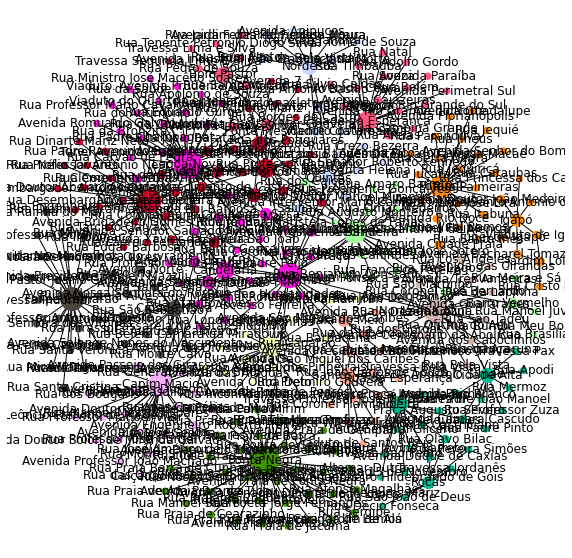

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
nx.draw_networkx(g, pos=pos, 
                 labels=labels,
                 node_size=node_size,
                 ax=ax,
                 node_color=node_color)

plt.axis("off")
plt.show()